In [1]:
import numpy as np
from matplotlib import pyplot as plt
import lib.numerical.pimc.metropolis as metropolis

In [2]:
N=100
a=0.5
eps=1.4
N_cor=20
N_cf=1000
E_0 = 0.5
E_1 = 1.5

In [3]:
def S(j,x): # harm. osc. S
    jp = (j+1)%N # next site
    jm = (j-1)%N # previous site
    return a*x[j]**2/2 + x[j]*(x[j]-x[jp]-x[jm])/a

In [4]:
def compute_G(x,n):
    g = 0
    for j in range(0,N):        
        g = g + x[j]*x[(j+n)%N]
    return g/N

In [5]:
avg, std = metropolis.compute_path_integral_average(compute_G, S, N, N_cf, N_cor, eps)

In [6]:
def delta_E(avg):
    delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        delta_E[n] = np.log(np.abs(avg[n]/avg[n+1]))
    return delta_E

def error_delta_E(avg, std):
    error_delta_E = np.zeros(N-1)
    for n in range (0,N-1):
        error_delta_E[n] = np.sqrt(((std[n] / avg[n])**2 + 
                                   (std[n+1] / avg[n+1])**2)) #propagation of error
    return error_delta_E

In [10]:
t = np.arange(N-1) * a
E_exact = np.ones(N-1) * (a*(E_1-E_0))

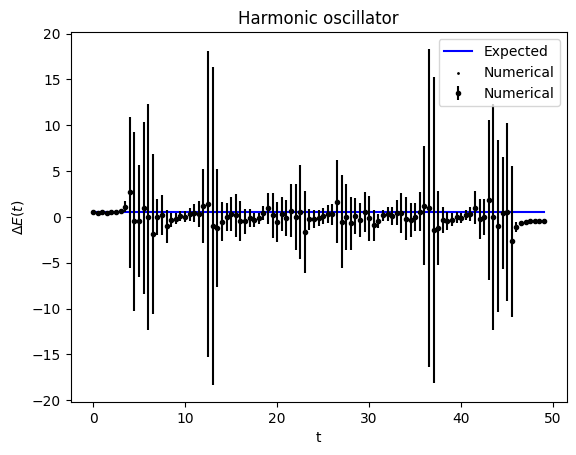

In [11]:
#plt.plot(t(np.zeros(N)),  average_G(matrix_g) ,'b',label='G')
#plt.errorbar(t(np.zeros(N)), average_G(matrix_g), yerr=std_G(matrix_g), fmt='.', color='black', label='Numerical')
plt.plot(t, E_exact ,'b',label='Expected')
plt.scatter(t, delta_E(avg), color='black', label='Numerical', s=1)
plt.errorbar(t, delta_E(avg), yerr=error_delta_E(avg, std), fmt='.', color='black', label='Numerical')
plt.legend(loc='upper right')
plt.title('Harmonic oscillator')
plt.xlabel('t')
plt.ylabel(r'$\Delta E(t)$')
plt.show()